<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">22.403 · Programació per a la ciència de dades</p>
    <p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

Programació per a la ciència de dades
============================

--- 

Unitat 6: Testing, manteniment i desplegament d'aplicacions Python
-----------------------------------------------------

---

### Instruccions d'ús

Aquest document és un notebook interactiu que intercala explicacions més aviat teòriques de conceptes de programació amb fragments de codi executables. Per aprofitar els avantatges que aporta aquest format, us recomanem que, en primer lloc, llegiu les explicacions i el codi que us proporcionem. D'aquesta manera tindreu un primer contacte amb els conceptes que hi exposem. Ara bé, **la lectura és només el principi!** Una vegada hagueu llegit el contingut proporcionat, no oblideu executar el codi proporcionat i modificar-lo per crear-ne variants, que us permetin comprovar que heu entès la seva funcionalitat i explorar-ne els detalls d'implementació. Per últim, us recomanem també consultar la documentació enllaçada per explorar amb més profunditat les funcionalitats dels mòduls presentats. 



In [1]:
# %load_ext pycodestyle_magic

In [2]:
# %pycodestyle_on

### Introducció

En aquesta unitat veurem com programar en Python sense utilitzar notebooks de jupyter. Així, comentarem com fer servir fitxers de codi Python pla com a font del codi, i discutirem sobre com organitzar-los per tal de facilitar la llegibilitat i el manteniment de les aplicacions. 

Després, explicarem (amb més detall del que hem fet fins ara), com funciona la gestió de llibreries de Python amb `pip`, i presentarem els entorns virtuals, que permeten crear entorns de programació aïllats en els quals executar els projectes.

A continuació, presentarem dues eines que es fan servir en el desenvolupament de programari: els sistemes de controls de versions i els entorns de desenvolupament integrats (*IDE*), i en presentarem dos dels més utilitzats (`git` per a control de versions i PyCharm com a IDE).

Finalment, descriurem el concepte de test unitari, i veurem com implementar-los en Python fent servir `unittest`.

A continuació s'inclou la taula de continguts, que podeu fer servir per a navegar pel document:

<ul style="list-style-type:none">
    <li><a href='#1.--Introducció'>1. Introducció</a></li>
    <li><a href="#2.--Organització-i-distribució-de-codi-Python">2. Organització i distribució de codi Python</a></li> 
    <ul style="list-style-type:none">
        <li><a href="#2.1.--L'ús-de-notebooks-de-jupyter">2.1. L'ús de notebooks de jupyter</a></li>
        <li><a href="#2.2.--Execució-de-codi-Python-en-fitxers-plans">2.2. Execució de codi Python en fitxers plans</a></li>
        <li><a href='#2.3.--Organització-de-codi'>2.3. Organització de codi</a></li>
        <li><a href='#2.4.--Gestió-de-llibreries'>2.4. Gestió de llibreries</a></li>
        <ul style="list-style-type:none">
            <li><a href='#2.4.1.--Fitxer-de-requeriments'>2.4.1. Fitxer de requeriments</a></li>
            <li><a href='#2.4.2.--Entorns-virtuals'>2.4.2. Entorns virtuals</a></li>
        </ul>
    </ul>
    <li><a href="#3.--Control-de-versions-i-treball-col·laboratiu">3. Control de versions i treball col·laboratiu</a></li>
    <ul style="list-style-type:none">
        <li><a href="#3.1.--Comandes-bàsiques-de-git">3.1. Comandes bàsiques de git</a></li>
    </ul>
    <li><a href="#4.--Testing-i-manteniment-d'aplicacions">4. Testing i manteniment d'aplicacions</a></li>
    <li><a href="#5.--Estructura-d'un-projecte-Python">5. Estructura d'un projecte Python</a></li>
    <li><a href="#6.--Entorns-de-desenvolupament-integrat">6. Entorns de desenvolupament integrat</a></li>
    <ul style="list-style-type:none">
        <li><a href="#6.1.--Funcionalitats-d'un-IDE">6.1. Funcionalitats d'un IDE</a></li>
        <li><a href="#6.2.--Creació-de-projectes-de-Python-amb-PyCharm">6.2. Creació de projectes de Python amb PyCharm</a></li>
    </ul>
    <li><a href='#7.--Exercicis-per-practicar'>7. Exercicis per practicar</a></li>
    <ul style="list-style-type:none">
        <li><a href='#7.1.--Solucions-als-exercicis-per-practicar'>7.1. Solucions als exercicis per practicar</a></li>
    </ul>
    <li><a href='#8.--Bibliografia'>8. Bibliografia</a></li>
    <ul style="list-style-type:none">
        <li><a href='#8.1.--Bibliografia-bàsica'>8.1. Bibliografia bàsica</a></li>
        <li><a href='#8.2.--Bibliografia-addicional---Ampliació-de-coneixements'>8.2. Bibliografia addicional</a></li>
    </ul>
</ul>

**Important**: 

**Nota:** Abans d'executar el codi d'aquest notebook, cal instal·lar una llibreria addicional. Per instal·lar llibreries en Python, farem servir `pip`, l'instal·lador de paquets de Python. 

Obriu ara una consola i executeu la següent instrucció, que instal·la el paquet `virtualenv`, que farem servir per crear entorns virtuals (la contrasenya demanada és `datasci`):

```
sudo pip install virtualenv
```

Només cal realitzar aquest pas **una única vegada**. 

# 1.- Introducció

A l'assignatura hem fet servir notebooks de jupyter per a programar en Python. Com heu pogut comprovar, els notebooks de jupyter són un entorn interactiu, que permet combinar l'execució de codi (en el nostre cas, en Python), amb explicacions textuals, que poden incloure fórmules matemàtiques, imatges, i altre contingut multimèdia.

Els notebooks de jupyter són una bona alternativa per a generar documents com els que hem estat utilitzant, que combinen codi, explicacions, i visualitzacions. A més, són fàcils de compartir, i permeten mostrar visualment els resultats d'anàlisis de dades. Per aquest motiu són utilitzats, habitualment, com a eina per a presentar i compartir resultats, i també com a eina de prototipatge. Tot i que les característiques dels notebooks els fan molt adequats per a aquest tipus de tasques, en certes situacions els notebooks no seran la millor alternativa per a programar en Python. És el cas, per exemple, de programes amb moltes línies de codi, molt complexos, o en els quals hi col·labora un equip de desenvolupadors. 

En aquests casos, serà més pràctic fer servir fitxers plans de Python, on el codi pot estar organitzat (facilitant el manteniment de codi llarg), que poden ser fàcilment controlats per sistemes de control de versions (imprescindibles per a la col·laboració d'equips), i pels quals disposem d'eines de desenvolupament més avançades que un navegador web. 

En aquesta unitat, explicarem com programar en Python fora dels notebooks de jupyter, i veurem tot un seguit d'eines i processos que es fan servir en el context del desenvolupament de programari, que ens seran útils per tal de desenvolupar aplicacions complexes.

# 2.- Organització i distribució de codi Python

## 2.1.- L'ús de notebooks de jupyter

Fins ara hem estat programant en Python fent servir *notebooks* de jupyter, que visualitzem, editem i executem amb un navegador accedint a un petit servidor web que despleguem en local (a la nostra màquina). En aquesta unitat, presentarem una de les alternatives més esteses per a programar en Python, que és l'ús de fitxer plans que contenen codi Python.

En primer lloc, revisarem l'arquitectura que estem fent servir actualment per a accedir al contingut de l'assignatura. 

![arquitectura](img/arquitectura_cat.png)

D'una banda, per tal de començar a treballar executem l'*script* `start_uoc.sh` a la màquina virtual. Aquest *script* aixeca un servidor de jupyter en local (dins de la nostra màquina), executa un navegador web (en el nostre cas, el Firefox), i obre una pestanya dins d'aquest navegador que carrega la url `http://localhost:8888`. Aquesta url apunta a l'arrel del servidor web incorporat en el jupyter, i ens permet navegar pel sistema de fitxers de la nostra màquina i visualitzar els notebooks gràficament. 

Ara bé, com són aquests *notebooks* quan els visualitzem en text clar? Doncs bé, els fitxers `.ipynb` (l'extensió prové d'*IPython notebooks*, que és com se'ls coneixia en el passat) són fitxers json, que contenen diferents cel·les. Cada cel·la és d'un tipus, que en determina com la visualitzarem. Així, per exemple, disposem de cel·les de *markdown* (com ara la cel·la on es troba aquest text que esteu llegint) i de cel·les de codi (que contenen codi Python que es pot interpretar i executar). A continuació hi trobareu un exemple del contingut json que es troba en un fitxer `.ipynb` (en aquest cas, correspon a un fragment de la primera unitat de l'assignatura):

```
{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# 1.- Estructures de dades per emmagatzemar col·leccions de valors"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 1,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "The list is:\n",
      "\t[1, 1, 3.5, 'strings also', [None, 4]]\n",
      "After appending 5 and removing 3.5:\n",
      "\t[1, 1, 'strings also', [None, 4], 5]\n"
     ]
    }
   ],
   "source": [
    "# Les llistes poden ser heterogènies i tenir duplicats\n",
    "a_list = [1, 1, 3.5, \"strings also\", [None, 4]]\n",
    "print(\"The list is:\\n\\t{}\".format(a_list))\n",
    "\n",
    "# Les llistes són mutables i ordenades\n",
    "a_list.append(5)\n",
    "a_list.remove(3.5)\n",
    "print(\"After appending 5 and removing 3.5:\\n\\t{}\".format(a_list))"
   ]
  },
  ...
]
}
```

Fixeu-vos com les cel·les de text (és a dir, les que tenen com a `cell_type` el valor `markdown`) només contenen un camp `source` amb el text, mentre que les cel·les de codi (les que tenen com a `cell_type` el valor `code`) tenen informació addicional, com ara el comptador d'execució (`execution_count`) o la sortida generada pel codi a l'executar-lo (`outputs`).

Pel que fa a les cel·les de codi, el servidor de jupyter s'encarrega d'executar-ne el codi fent servir l'intèrpret de Python i de recuperar-ne la sortida, que s'incrusta després al *notebook* (i es mostra a l'usuari a través del navegador web).

## 2.2.- Execució de codi Python en fitxers plans

Una de les alternatives que podem fer servir per a executar codi Python sense utilitzar jupyter és escriure el codi en fitxers plans, que s'executaran directament amb l'intèrpret de Python. 

Els fitxers plans de Python són fitxers de text pla que contenen codi font escrit en Python i que tenen l'extensió `.py`. Aquests fitxers contindrien el codi que hem estat programant en cel·les de codi en els *notebooks*. De la mateixa manera que el codi en els *notebooks*, el codi Python en text pla pot contenir comentaris (ja siguin d'una sola línia, començats amb `#`; com multilínia, delimitats amb `'''`), i estarà indentat seguint la sintaxi de Python.

Per tal d'editar aquests fitxers, farem servir un editor de text pla, o bé un entorn de desenvolupament integrat (en anglès, l'anomenem IDE, d'*integrated development environment*).

![arquitectura-python-pla](img/py_cat.png)


Quan aquests fitxers contenen un fragment de codi pensat per a ser executat **només** de manera directa per l'usuari normalment l'anomenem **_script_ de Python**; mentre que si el codi està pensat per a poder-se importar des d'un altre fitxer de Python l'anomenem **mòdul**. 

A la carpeta `python_code` hi trobareu un exemple de mòdul en Python molt simple (`hello_world.py`), que està pensat per poder-se importar, però també per a executar-se directament.

El contingut del fitxer és el següent:

```
#!/usr/bin/ python
# -*- coding: utf-8 -*-


def to_upper(x):
	return x.upper()


if __name__ == "__main__":
	print(to_upper("Hello world!"))

```

Noteu com el fitxer conté únicament codi (i comentaris de codi), però no text en *markdown* ni imatges com podem tenir als *notebooks*.

D'altra banda, el codi té dues parts diferenciades:
* La definició de la funció `to_upper`.
* Un `print` d'un missatge.

El `print` es troba dins d'un bloc `if`, que comprova si la variable `__name__` és igual a la cadena de caràcters `__main__`. La variable `__name__` és una variable especial assignada per l'intèrpret de Python, que pren el valor `__main__` quan el fitxer s'executa com a programa principal. En canvi, quan s'importa com a mòdul, la variable pren el nom del mòdul. Quan es programen mòduls que poden ser utilitzats tant importats des d'altres programes com com a programes principals, és habitual fer servir aquesta construcció per indicar què ha de fer el programa quan s'executa com a programa principal.

Per tant, si executem aquest codi com a programa principal, es mostrarà el missatge `HELLO WORLD!` per pantalla, mentre que si l'importem com a mòdul des d'un altre programa, aquest missatge no es mostrarà. Pel que fa a la definició de la funció `to_upper`, aquesta sempre s'executarà, ja que no es troba dins del bloc `if`. 

Per tal d'executar aquest codi Python com a programa principal, ens situarem a la carpeta dins d'un terminal del sistema, i executarem la instrucció següent:

```
$ python hello_world.py
```

Això executarà el codi, que mostrarà per pantalla el missatge `HELLO WORLD!`.

D'altra banda, podem importar aquest fitxer com a mòdul dins del nostre codi Python fent servir la instrucció `import` (com ja hem estat fent amb les llibreries que hem anat fent servir a l'assignatura). 

In [3]:
from python_code import hello_world

Una vegada importat el mòdul, podem fer-ne servir les funcions que s'hi han implementat:

In [4]:
hello_world.to_upper("test message")

'TEST MESSAGE'

Fixeu-vos que, a l'importar el mòdul, el missatge `HELLO WORLD!` no s'ha mostrat. D'altra banda, fixeu-vos com, en aquest cas, hem importat el mòdul des d'un *notebook*, però això no té perquè ser sempre així. També es poden importar mòduls des d'altres mòduls o altres *scripts* de Python, programats en fitxers plans de codi.

## 2.3.- Organització de codi

Ja hem vist un parell de maneres d'organitzar codi Python: amb l'ús de funcions i fent servir classes. Tant les funcions com les classes permeten segmentar el codi, per funcionalitats o per entitats (respectivament), cosa que ajuda a crear codi clar, reutilitzable i fàcilment mantenible. Ara bé, imaginem un codi que disposa d'un miler de funcions, totes elles codificades en un mateix *notebook* de jupyter o fitxer de codi Python pla. Per molt ben documentades que estiguin aquestes funcions, mantenir aquest codi o, fins i tot, fer-lo servir, és una tasca molt complexa.

Per tal de treballar amb programes amb moltes línies de codi, el que es fa és separar diferents fragments de codi en diferents fitxers (que, com ja hem comentat, anomenarem **mòduls**), i organitzar aquests fitxers en **paquets** (conjunts de mòduls).

De fet, ja hem fet servir mòduls externs (important-los en els nostres *notebooks*) durant tota l'assignatura. Ara bé, fins ara no havíem vist com podíem crear aquests mòduls, ni havíem reflexionat sobre les seves implicacions a nivell del disseny d'aplicacions. Doncs bé, un mòdul no és res més que un fitxer python, que pot contenir tant instruccions com definicions de funcions (com hem vist a l'exemple de l'apartat anterior). 

Els paquets són conjunts de mòduls, estructurats de manera jeràrquica. Pel que fa a l'estructura del codi font, podem definir aquesta estructura jeràrquica fent ús de carpetes. Per exemple, fixem-nos en l'estructura de carpetes que presenta [el paquet `networkx`](https://github.com/networkx/networkx/tree/master/networkx) (que ofereix representacions i funcions sobre grafs), de la qual en reproduïm un subconjunt a continuació:

```
networkx
    __init__.py
    algorithms
        __init__.py
        community
            __init__.py
            centrality.py
            modularity_max.py
            ...
        ...
    classes
    drawing
    generators
    linalg
    ...
```

El paquet `networkx` conté diverses carpetes, que alhora contenen altres carpetes que contenen fitxers de codi en python amb extensió `.py`. Així, per exemple, el mòdul `centrality`, es troba dins de `community`, que alhora està a `algorithms`. L'estructura de carpetes defineix doncs la jerarquia dels paquets. 

És interessant notar que les carpetes contenen un fitxer `__init__.py`: aquest fitxer és necessari per a indicar a Python que cal tractar aquesta carpeta com a paquet i, per tant, per poder importar-lo després des d'altres aplicacions. El fitxer `__init__.py` és un fitxer Python normal, i pot estar buit (de fet, sovint en serà el cas) o bé pot contenir codi d'inicialització per al paquet. En aquest últim cas, el fitxer contindrà el codi a executar en el moment de la importació.

Pel que fa a la importació dels paquets, podem o bé importar tot el paquet sencer, o bé importar només algun dels submòduls que el conformen o, fins i tot, importar funcions o classes concretes. Així, per exemple, podem importar el paquet `networkx` amb:

In [5]:
# Importem el paquet networkx
import networkx

# Creem un graf de networkx
g = networkx.Graph()

Ara bé, aquest tipus d'importació no és molt eficient: d'una banda, si només necessitem algun mòdul o funció concreta de la llibreria `networkx`, no voldrem importar-lo sencer; d'altra banda, haver d'escriure `networkx` cada vegada que fem servir alguna definició del paquet, és tediós.

Pel que fa a aquesta segona problemàtica, Python permet assignar un nou nom dins de la nostra aplicació a les importacions, fent servir la paraula clau `as`:

In [6]:
# Importem el paquet networkx com a nx
import networkx as nx

# Creem un graf de networkx
g = nx.Graph()

Ara, podem utilitzar `nx` dins del nostre codi per referir-nos a `networkx`.

D'altra banda, pel que fa a la importació de més definicions de les que realment es necessiten, Python permet importar només un mòdul concret de dins del paquet. Per exemple, podem importar el mòdul `centrality`, fent:

In [7]:
import networkx.algorithms.community.centrality

o bé:


In [8]:
from networkx.algorithms.community import centrality

Si la unitat que volem importar és un mòdul o un paquet, podem fer servir les dues sintaxis d'importació. Ara bé, si el que volem importar és una classe, una funció o una variable que es troba definida dins d'un mòdul, només podrem fer servir la segona sintaxis. Vegem-ho, per exemple, important la funció `girvan_newman` que es troba al subpaquet `centrality`:

In [9]:
# Importació correcta de la funció girvan_newman
from networkx.algorithms.community.centrality import girvan_newman

In [10]:
# Importació incorrecta, que genera una excepció
try:
    import networkx.algorithms.community.centrality.girvan_newman
except ModuleNotFoundError as e:
    print(e)

No module named 'networkx.algorithms.community.centrality.girvan_newman'; 'networkx.algorithms.community.centrality' is not a package


Ja em vist doncs com podem crear mòduls i paquets en Python, i com podem importar-los per a fer-los servir en altres aplicacions. Arribats a aquest punt i pel que fa a la creació dels nostres propis paquets en Python, en hauríem de plantejar doncs com hem d'estructurar els nostres projectes de codi. En aquesta secció, descriurem algunes idees pel que fa a l'estructura dels fitxers de codi Python. Després, a l'apartat 5, parlarem de com podem estructurar els projectes més enllà del nostre codi (considerant detalls com la documentació, la llicència, els requeriments, etc.).

No hi ha una recepta màgica que contingui un conjunt de regles a seguir per tal d'estructurar el codi d'un projecte en mòduls i paquets. Per a un mateix projecte, existeixen moltíssimes maneres d'estructurar-lo i, sovint, serà difícil decidir quina d'elles és la *millor*, en tant que algunes decisions de disseny sacrificaran algun benefici per tal d'aconseguir-ne algun altre. Tot i això, algunes bones pràctiques a seguir són:

* Cal intentar promoure la **simplicitat** i la **llegibilitat** del nostre codi, així com evitar estructures amb molts nivells de composició. Així, és recomanable que l'estructura de paquets i mòduls que creem per al nostre projecte sigui simple, i afegir-hi complexitat només si és necessari per a facilitar-ne la comprensió o organització.  Alhora, també és important que el codi sigui fàcilment llegible, de manera que caldrà prestar especial atenció als **noms dels paquets i mòduls**, per intentar que transmetin el màxim d'informació possible.

    El [PEP20](https://www.python.org/dev/peps/pep-0020/) conté un recull de principis per a programar en Python en forma d'aforismes, alguns dels quals són aplicables a l'estructura del codi i dels qual se'n deriven les propietats que acabem d'esmentar. Les primeres línies del PEP20 són les següents:

```
Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
...
```

* Cal intentar **organitzar** el codi en mòduls i paquets de manera que sigui fàcil per a un lector trobar on hauria d'estar una determinada definició. En aquest sentit, sovint és interessant agrupar les funcionalitats que aborden un mateix concepte en l'aplicació. Normalment, interessarà minimitzar l'acoblament dels mòduls, fent que cada mòdul necessiti conèixer el mínim d'informació possible sobre el funcionament dels altres mòduls. 

    Seguint amb l'exemple de `networkx`, el paquet `community` conté mòduls relacionats amb la detecció de comunitats: el mòdul `centrality` implementa la detecció de comunitats fent servir l'algorisme de Girvan-Newman; el mòdul `klique` fent servir la definició de comunitats basada en la subestructura del *k*-clique; el mòdul `label_progagation` utilitzant un algorisme de propagació d'etiquetes, etc. 
    
    Alhora, el paquet `community` forma part del paquet `algorithms`, que agrupa diversos algorismes sobre xarxes. Dins de `algorithms`, hi trobem doncs el paquet `community`, que agrupa els algorismes de detecció de comunitats; el paquet `shortest_paths`, que agrupa algorismes de càlcul dels camins més curts; el paquet `flow`, que conté algorismes basats en fluxos, etc.


* Cal intentar **evitar la repetició** de codi. En gairebé tots els projectes hi ha fragments de codi que poden ser aprofitats amb una petita variació en diversos llocs. En aquests casos, el més ràpid acostuma a ser simplement copiar el codi en aquests diversos llocs, i fer-ne les petites adaptacions que permetin ajustar-lo a la funcionalitat desitjada en cada lloc. Tot i que aquesta opció sigui més ràpida, en general cal intentar evitar-la, ja que genera codi difícil de mantenir. Per exemple, si es detecta un error en aquest fragment de codi, per arreglar-lo caldrà recordar tots els llocs on el codi es troba duplicats, i fer la correcció en tots ells. En general, és preferible intentar fer una única versió del codi, que sigui capaç de gestionar les diverses casuístiques.


* És important fer refacció del codi (en anglès, en diem **_refactoring_**) quan calgui. Anomenem *refactoring* al procés de modificació del codi amb l'objectiu de millorar-lo, sense canviar-ne la seva funcionalitat. En aquest context, millorar el codi implica netejar-lo, endreçar-lo, fer-lo més eficient, més mantenible, reutilitzable, etc. És important fer *refactoring* per mantenir la qualitat del codi conforme el projecte creix, però també cal valorar quan és important fer-ho, ja que suposa una inversió de temps. En el context de l'estructura del projecte, serà important tenir en compte les implicacions que els canvis tinguin en el nostre projecte, així com en possibles projectes que en depenguin.


Si esteu interessats en aprendre detalls addicionals sobre l'estructuració en paquets de codi Python, us recomanem la lectura de [l'article següent](https://intermediate-and-advanced-software-carpentry.readthedocs.io/en/latest/structuring-python.html) del curs de programació en Python d'en T. Brown.

## 2.4.- Gestió de llibreries

El Python és un llenguatge de programació que disposa de molts paquets i mòduls externs (és a dir, que no es troben a la [llibreria estàndard de Python](https://docs.python.org/3/library/index.html)). Ja hem vist en altres unitats que podem instal·lar llibreries Python fent servir `pip`. El `pip` (de les seves sigles en anglès, *Pip Installs Packages*) és un instal·lador de paquets de Python que permet instal·lar paquets que es troben en uns índexs públics. Per instal·lar un paquet, simplement cal executar:

```
$ pip install nom_del_paquet
```

Això farà que s'instal·li el paquet especificat, així com totes les dependències que necessiti per a la seva execució.

També podem instal·lar versions concretes d'un paquet, especificant-ho a la instrucció d'instal·lació. Així, per exemple, 

```
$ pip install pandas==0.25.3
```

instal·la la versió `0.25.3` de `pandas`.

Per tal de desinstal·lar un paquet instal·lat amb `pip`, només cal executar-lo de nou amb l'argument `uninstall`:

```
$ pip uninstall nom_del_paquet
```

El `pip` descarrega els paquets a instal·lar del *Python Package Index* ([PyPI](https://pypi.org/)), l'índex de paquets per defecte de la comunitat Python, que es troba obert a tots els desenvolupadors. Addicionalment, es pot fer servir `pip` per a instal·lar paquets d'altres índexs, especificant-ne la url amb el *flag* `--index-url`.

### 2.4.1.- Fitxer de requeriments

L'ús de llibreries externes en Python facilita el desenvolupament de programes (ja que els programadors poden reutilitzar codi ja existent), però alhora pot dificultar la portabilitat de codi entre diferents màquines (ja que un codi que depengui de llibreries externes no funcionarà si aquestes llibreries no es troben instal·lades al sistema). A més, a vegades no només caldrà que les llibreries estiguin instal·lades, sinó que serà necessari que la versió instal·lada sigui la mateixa per a la qual es va desenvolupar el codi (ja que diferents versions d'una mateixa llibreria poden disposar de funcions diferents, tenir diferents comportaments per defecte, etc.).

Per a ajudar a reproduir l'entorn en què un programa pot executar-se correctament, en els projectes de programació en Python s'acostuma a crear un fitxer (anomenat habitualment `requirements.txt`) que conté un llistat de totes les dependències del projecte, és a dir, de totes les llibreries que cal tenir instal·lades per a executar el codi del projecte. Addicionalment, aquest fitxer també pot especificar requisits sobre les versions de les llibreries que cal instal·lar, per exemple, indicant que cal una versió concreta d'un llibreria o bé la versió mínima que cal tenir.

A partir d'un fitxer de requeriments, podem fer servir `pip` per a instal·lar totes les llibreries que calen per a un projecte fent servir la comanda següent:

```
$ pip install -r requirements.txt
```

A més de gestionar la instal·lació de paquets, `pip` també permet generar un fitxer amb totes les llibreries instal·lades en un entorn de Python:

```
$ pip freeze > requirements.txt
```

Si executem la comanda anterior a la màquina virtual de l'assignatura, veureu que es genera una llista prou gran, que conté totes les llibreries instal·lades juntament amb la seva versió:

```
asn1crypto==0.24.0
attrs==19.1.0
Automat==0.7.0
backcall==0.1.0
bleach==3.1.0
catfish==1.4.4
certifi==2018.1.18
chardet==3.0.4
command-not-found==0.3
constantly==15.1.0
cryptography==2.1.4
cssselect==1.0.3
cupshelpers==1.0
cycler==0.10.0
decorator==4.4.0
defer==1.0.6
defusedxml==0.6.0
distro-info===0.18ubuntu0.18.04.1
entrypoints==0.3
flake8==3.7.9
future==0.17.1
geoplotlib==0.3.2
googlemaps==3.0.2
httplib2==0.9.2
hyperlink==19.0.0
idna==2.6
incremental==17.5.0
ipykernel==5.1.1
ipython==7.6.0
ipython-genutils==0.2.0
ipywidgets==7.4.2
jedi==0.14.0
Jinja2==2.10.1
joblib==0.13.2
jsonschema==3.0.1
jupyter==1.0.0
jupyter-client==5.2.4
jupyter-console==6.0.0
jupyter-core==4.5.0
keyring==10.6.0
keyrings.alt==3.0
kiwisolver==1.1.0
language-selector==0.1
launchpadlib==1.10.6
lazr.restfulclient==0.13.5
lazr.uri==1.0.3
lightdm-gtk-greeter-settings==1.2.2
line-profiler==3.0.2
lxml==4.4.0
MarkupSafe==1.1.1
matplotlib==3.1.1
...
```

Ara bé, la sortida que hem obtingut del `pip freeze` **no** seria adequada com a contingut d'un fitxer de requeriments per al nostre projecte. Si us hi fixeu, conté moltes llibreries, i no només les que hem instal·lat nosaltres explícitament al sistema. Això és degut a què algunes llibreries tenen dependències d'altres llibreries. Aquestes dependències s'instal·len en el nostre sistema quan instal·lem la llibreria objectiu, i s'afegeixen també a la llista generada per `pip freeze`, però detallar-les al fitxer de requeriments del nostre projecte pot ser contraproduent ja que augmenten la complexitat de la gestió. Per exemple, a l'instal·lar la llibreria `matplotlib` que fem servir per a generar gràfiques, s'instal·la `kiwisolver` com a dependència. Però nosaltres no estem interessats en tenir la versió 1.1.0 de `kiwisolver`, o ni tan sols en tenir la llibreria `kiwisolver` instal·lada, més enllà de que sigui necessària per a poder disposar de `matplotlib`: si en un futur `matplotlib` deixa de necessitar utilitzar `kiwisolver`, aleshores el nostre projecte tampoc la necessitarà. Per tant, és millor no especificar aquesta dependència al fitxer de requeriments del nostre projecte: voldrem especificar `matplotlib`, que és la llibreria que fem servir.

### 2.4.2.- Entorns virtuals

A més de la gestió de llibreries que permeti assegurar la portabilitat del nostre codi, a vegades els programadors de Python també es poden trobar amb conflictes pel que fa a les necessitats dels diversos projectes en els quals treballen. Així, per exemple, imagineu que esteu treballant en un projecte d'anàlisi de dades que necessita com a mínim la versió 1.0 de la llibreria `pandas` (ja que fa servir el mètode [`to_markdown`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_markdown.html#pandas.DataFrame.to_markdown) per a mostrar uns *dataframes* en format *markdown*, i aquest mètode és nou de la versió 1.0) i, alhora, esteu treballant en un altre projecte que necessita tenir com a molt la versió 0.25 de la mateixa llibreria (ja que fa servir `SparseSeries` per a representar sèries de dades *sparse*, i aquest tipus de dades desapareix en versions posteriors de la llibreria). A llarg termini, segurament la millor opció seria migrar el codi que necessita `SparseSeries` per a funcionar, adaptant-lo així a les noves versions de les llibreries. A vegades, però, això no és possible, ja que requereix de moltes hores de feina que no es poden dedicar a aquest projecte, o d'altres dependències que ho impedeixen.

Tant per mantenir les llibreries necessàries per a un projecte amb l'objectiu de millorar la portabilitat com per permetre l'execució de programes amb llibreries en conflicte, quan desenvolupem en Python normalment fem servir **entorns virtuals** (en anglès, parlem de *virtual environments* o *venvs*). Un entorn virtual és un entorn de programació aïllat, que conté el seu propi binari de Python, així com les seves pròpies llibreries. Això permet, d'una banda, mantenir diversos entorns en una mateixa màquina, que poden tenir dependències conflictives entre ells (com que els entorns es troben aïllats uns dels altres, no hi ha cap mena d'incompatibilitat entre les dependències de cada entorn). Així, podem fer servir un entorn virtual per a cadascun dels nostres projectes en Python, que mantingui les llibreries necessàries per a aquell projecte, i que sigui fàcilment reproduïble en una altra màquina (a través de l'especificació de fitxers de requeriments).

L'ús d'entorns virtuals ens ofereix diversos avantatges:
* Facilitat de gestionar dependències (i evitar conflictes com els que hem mencionat anteriorment).
* Possibilitat d'instal·lar llibreries sense permís de superusuari.
* Assegura que no modifiquem les llibreries de Python del sistema.
* Permet la reproducció dels entorns de treball dels projectes en altres màquines.

Hi ha diverses maneres de gestionar entorns virtuals en Python. En aquesta unitat didàctica presentarem l'eina [`virtualenv`](https://virtualenv.pypa.io/en/latest/).

Per tal de crear un entorn virtual amb `virtualenv` simplement cridarem a `virtualenv` amb un únic argument: el nom del directori on volem crear l'entorn virtual:

```
$ virtualenv venv
```

Això crearà una carpeta (en aquest cas, de nom `venv`), que contindrà un fitxer de configuració i dues subcarpetes (`bin` i `lib`), que contindran còpies de la versió de Python que farà servir l'entorn, fitxers d'interacció amb l'entorn, enllaços simbòlics a certs fitxers necessaris, i els fitxers que ens permetran activar i desactivar l'entorn (i que presentarem a continuació).

Una vegada creat l'entorn virtual, per tal de fer-lo servir caldrà activar-lo, executant:

```
$ source venv/bin/activate
```

A partir d'aquest moment, ens trobarem dins de l'entorn virtual (noteu com el cursor de la consola canvia per indicar que ens trobem dins de l'entorn `venv`):

```
(venv) datasci@datasciuoc:~$ 
```

Si ara executem `pip freeze` dins de l'entorn virtual, veurem que la sortida és una llista buida, ja que encara no hi hem instal·lat cap llibreria. Podem instal·lar llibreries dins de l'entorn de la mateixa manera que ho hem estat fent fins ara, amb `pip`. En particular, serà útil executar `pip install -r requirements.txt` dins de l'entorn virtual, per tal de reconstruir un entorn per a un projecte concret. Qualsevol llibreria que instal·lem mentre ens trobem dins de l'entorn, estarà disponible només dins d'aquest entorn virtual (i no serà accessible ni des del sistema ni des d'altres entorns virtuals). Per a executar els nostres programes en Python dins de l'entorn també ho farem com fins ara, executant `python nom_del_fitxer.py`.

Per tal de sortir de l'entorn virtual, executarem la sentència `deactivate`:

```
(venv) datasci@datasciuoc:~$ deactivate
```

# 3.- Control de versions i treball col·laboratiu

Si tornem enrere i revisitem el diagrama amb el flux de treball que hem estat fent servir a l'assignatura, podem apreciar com hi ha una part de l'esquema que no hem comentat encara, que correspon a com s'obtenen els fitxers `ipynb`.

Per tal d'obtenir els *notebooks* que conformen tant les unitats de l'assignatura com les activitats, executem l'script `get_content.sh` dins de la màquina virtual. Aquest *script* és només una petita interfície cap a un servidor de git que conté el material de l'assignatura. 

Git és un **sistema de control de versions**, és a dir, un programari que permet gestionar els canvis al llarg del temps sobre un conjunt d'arxius, i que es fa servir per a mantenir els fitxers de codi font i la documentació dels projectes de software.

Així, imagineu que esteu treballant en un projecte de dades que requereix construir un model per a predir les compres que es fan en supermercats. Aquest model l'heu entrenat amb un conjunt de dades que conté variables que descriuen les compres que s'han fet en els últims sis mesos, així com la predicció meteorològica de la zona on es troba el supermercat i els esdeveniments esportius principals que se celebren al país on es troba el supermercat. Una vegada teniu una primera versió d'aquest model, el compartiu amb un company de l'àrea de visualització de dades, que treballarà en generar visualitzacions que permetin explicar les prediccions del model; i també amb l'àrea de compres del supermercat, que comença a fer servir les prediccions del model per a ajustar les comandes. Aquesta compartició la feu donant accés al vostre codi (per exemple, compartint l'accés al servidor de jupyter on treballeu). Sense massa temps per preveure-ho, de cop us trobeu amb què el país es troba en estat d'alarma per una pandèmia mundial, cosa que fa que els hàbits de consum del supermercat canviïn radicalment. Com a científics de dades, us poseu a modificar el model, per tal d'ajustar-lo a les noves condicions! Comenceu a pensar en quines noves variables o atributs caldrà per a entrenar un nou model que s'ajusti a la situació del moment, i a recollir aquestes dades. Ara bé, si comenceu a modificar el codi del model que teníeu per a adaptar-lo als nous requisits, els companys del departament de compres i de visualització de dades es quedaran sense una versió funcional del model durant tot el temps que vosaltres l'estigueu actualitzant. És més, podria ser que els companys de visualització de dades ja hagin començat a treballar en la visualització de les explicacions del model original, de manera que prefereixin treballar amb la versió anterior del vostre codi, per acabar de crear visualitzacions que expliquin el model d'abans de la pandèmia. 

És en casos com aquest, i també en situacions molt més complexes, en les quals diferents persones col·laboren en un mateix projecte de software, i necessiten poder contribuir al projecte al mateix temps i/o treballar en versions diferents del mateix codi, tot mantenint l'historial de canvis de cadascú i permetent reconciliar els canvis quan calgui, és quan els sistemes de control de versions de *software* prenen més sentit.

Hi ha multitud de programaris de control de versions, però en aquesta unitat ens centrarem a fer una breu presentació de git, ja que és el que hem estat fent servir a l'assignatura, i també un dels més populars actualment.

Git és un sistema de control de versions **distribuït** (en anglès, parlem de DVCS, per les sigles en anglès de *distributed version control system*): per a un mateix projecte, poden existir diverses còpies distribuïdes del repositori que el conté. Normalment, els diferents desenvolupadors involucrats en un projecte mantindran repositoris complets en local del projecte, el que els permetrà treballar de manera autònoma (i sense dependre d'una connexió a constant a Internet).

Un **repositori** és un conjunt de carpetes i fitxers associats a un projecte en concret, per als quals es desa tot l'historial de revisions que s'hi han fet.

L'historial de revisions és un conjunt d'instantànies en el temps, que anomenem **_commits_**: cada nou *commit* captura l'estat del projecte en un instant de temps concret. Els *commits* tenen un missatge associat, que permet als desenvolupadors informar sobre el contingut d'aquella instantània.

Git estructura els *commits* fent servir un graf: cada *commit* és un node del graf, que té un punter al node del seu *commit* pare. El primer *commit* d'un projecte és l'únic que no té pare. La majoria de *commits* tindran un únic pare, ja que suposaran una evolució d'un estat anterior del codi. En canvi, hi haurà alguns *commits* que tindran dos pares, i que permetran reconciliar canvis (fets normalment per diferents persones treballant sobre el mateix projecte).

## 3.1.- Comandes bàsiques de git

Doncs bé, tornant a l'*script* `get_content.sh`, el que fa aquest *script* és executar una comanda de git per a obtenir una còpia del repositori on hi ha els *notebooks* de cadascuna de les unitats o activitats de l'assignatura. La comanda de git que ens permet  descarregar una còpia d'un repositori és la comanda `clone`. Per exemple, podeu descarregar el contingut de la primera unitat de l'assignatura, executant en una terminal:

```
$ git clone https://eimtgit.uoc.edu/prog_datasci_2/resources/unit_0.git
```

Això crearà una carpeta `unit_0` amb una còpia del repositori de la unitat 0, que és exactament el que ja hauríeu de tenir a la carpeta `~/prog_datasci_2/resources/unit_0`, i que vau descarregar fent servir l'*script* `get_content.sh`.

És interessant notar que amb un `clone` no heu descarregat els fitxers dels *notebooks* i prou, sinó que heu creat una còpia del repositori de git, que conté l'historial de versions dels fitxers que el conformen.

La comanda `log` permet recuperar els *logs* dels *commits* d'un repositori de git. Si executem la comanda en el repositori de la unitat 0:

```
$ cd unit_0
$ git log
```
veurem que els dos primers *commits* es van fer al març de 2020, coincidint amb l'inici de l'assignatura:

```
commit 772187caddb56214aed476715cf080b0e4335c6c (HEAD -> master, origin/master, origin/HEAD)
Author: Cristina Perez Sola <cperezsola@uoc.edu>
Date:   Mon Mar 2 16:58:43 2020 +0100

    Pdfs added + README update

commit fd7d8fe72dc75680835f42aa8539e2210d231272
Author: Cristina Perez Sola <cperezsola@uoc.edu>
Date:   Mon Mar 2 16:54:26 2020 +0100

    Unit 0 notebooks in cat and es
```

Per cada *commit*, la comanda `log` en detalla el hash que l'identifica de manera única, l'autor, la data i el comentari associat.

La comanda `status` mostra l'estat actual de la carpeta de treball del projecte i de l'*stage*. L'*stage* és una mena de *buffer* on es dipositen els fitxers que es volen incloure en un *commit*: conté tots els fitxers que estan a punt per a incloure'ls en el següent *commit*. Si executem `status` al repositori de la unitat 0:  

```
$ git status
```

obtindrem la sortida següent, que indica que ens trobem a la branca `master` i que no tenim fitxers pendents de *commit* (ja que acabem de clonar el repositori):

```
On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean
```

Ara, podríem procedir a contribuir al projecte de la unitat 0, per exemple, modificant el fitxer del *notebook* per a afegir-hi algun exemple addicional o bé afegint algun altre fitxer al projecte. Com a exemple, afegirem un nou fitxer al repositori, i modificarem el contingut del fitxer `README.md`. Executeu les següents instruccions dins de la carpeta de la unitat 0:

```
$ echo "Trying git" > test.md
$ echo "Modifying readme" >> README.md
```

Amb aquestes instruccions hem creat un nou fitxer `test.md`, que conté una línia de text `Trying git`; i hem modificat el contingut del fitxer `README.md`, afegint-hi una línia al final. 

Si ara executem de nou `git status`, veurem com ens informa que hi ha canvis en fitxers que ja estaven al repositori (*Changes not staged for commit*) i també que s'ha detectat un fitxer nou que no està seguit (*Untracked files*).

```
On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   README.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	test.md

no changes added to commit (use "git add" and/or "git commit -a")

```

És interessant notar que no hi ha cap canvi a l'*stage* (l'àrea on es desen els fitxers a incloure en un *commit*): de moment, hi ha hagut modificacions als fitxers, però encara no hem creat cap instantània que les contingui.

Si volem crear una instantània, per tal que el repositori passi a mantenir una còpia de l'estat actual dels fitxers en el seu històric, caldrà crear un nou *commit*. Aquesta tasca es fa en dues fases: primer s'afegeixen els fitxers a incloure a l'*stage*, i després es crea el *commit*. 

Per afegir fitxers a l'*stage*, fem servir la comanda `add`:

```
$ git add test.md README.md
```

Si ara visualitzem l'estat del repositori, veurem que git ens informa que hi ha dos fitxers amb canvis pendents de *commit*: un nou fitxer (`test.md`) i un fitxer modificat (`README.md`).
```
On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	modified:   README.md
	new file:   test.md
```

Ara, crearem el *commit* amb la instrucció `commit`:

```
$ git commit -m "My first commit"
```

El *flag* `-m` permet especificar el missatge associat a un *commit*. Amb aquesta comanda, haurem creat una nova instantània, que queda desada al nostre repositori, i que conté l'estat actual dels fitxers. Si ara tornem a executar `git log` per veure l'historial de *commits* del repositori, podrem veure com efectivament, el nostre *commit* nou hi apareix:

```
commit 4373ee49b9d8fb7f2e3c02e6aff7b2dac5949bdf (HEAD -> master)
Author: datasci <cperezsola@uoc.edu>
Date:   Thu March 19 16:05:41 2020 +0200

    My first commit

commit 772187caddb56214aed476715cf080b0e4335c6c (origin/master, origin/HEAD)
Author: Cristina Perez Sola <cperezsola@uoc.edu>
Date:   Mon Mar 2 16:58:43 2020 +0100

    Pdfs added + README update

commit fd7d8fe72dc75680835f42aa8539e2210d231272
Author: Cristina Perez Sola <cperezsola@uoc.edu>
Date:   Mon Mar 2 16:54:26 2020 +0100

    Unit 0 notebooks in cat and es
```

És important notar que el *commit* que acabem de fer s'ha aplicat al repositori que hi ha a la nostra màquina virtual (recordem que git és un sistema de control de versions distribuït). Si volem, podríem enviar aquest *commit* també al repositori d'origen d'on hem clonat la nostra còpia, per tal que altres desenvolupadors també en tinguin accés. Ara bé, en aquest cas, com que no teniu permisos per a contribuir al repositori de l'assignatura, aquesta acció no la podreu fer.

Aquesta secció només inclou una molt breu introducció a git. Per tal d'acabar d'entendre els conceptes claus de git, us recomanem consultar aquests tres vídeo-tutorials ([1](https://www.youtube.com/watch?v=8oRjP8yj2Wo), [2](https://www.youtube.com/watch?v=uhtzxPU7Bz0), [3](https://www.youtube.com/watch?v=7w5Z7LmyLgI)) de les guies oficials, que expliquen més visualment les idees sobre les quals es construeix git. D'altra banda, si voleu anar més enllà d'aquests conceptes clau, us recomanem la lectura de la [git pocket guide](https://www.oreilly.com/library/view/git-pocket-guide/9781449327507/ch01.html), i consultar la pàgina de [recursos de github](https://try.github.io/), que conté diversos tutorials interactius.


# 4.- Testing i manteniment d'aplicacions

Les proves de programari (conegudes en anglès com a *software testing*) són els processos que es desenvolupen per tal de comprovar que el programari compleix els resultats requerits. 

Així, per exemple, hem vist com una pràctica habitual en el preprocessament de dades consisteix a substituir els valors perduts per la mitjana de l'atribut. Com podem assegurar que el codi que hem implementat per a preprocessar les nostres dades està fent aquesta substitució correctament? 

Els testos unitaris (en anglès, en diem _**unit testing**_) són proves que verifiquen el funcionament d'un fragment de codi especific (habitualment una funció o un mètode d'una classe). En aquesta unitat, veurem com programar testos unitaris en Python. Existeixen altres tipus de testos, per exemple, els testos d'integració, que comproven les interfícies entre diversos components de *software*; o els de sistema, que validen sistemes complets ja integrats.

Existeixen diferents llibreries que faciliten la creació de testos unitaris en Python. En aquest *notebook*, presentarem [`unittest`](https://docs.python.org/3.8/library/unittest.html), un mòdul de testing que trobem inclòs a la llibreria estàndard de Python.

La unitat bàsica de proves en [`unittest`](https://docs.python.org/3.8/library/unittest.html) és el cas de prova (o *test case*). Els casos de proves s'agrupen en *test suites*, que poden contenir tant casos de prova com altres *suites*.

Cada test *case* conté una o diverses crides a la funció o fragment de codi a provar, i en comprova que el resultat retornat sigui el que s'espera. Per fer-ho, es fan servir sentències [`assert`](https://docs.python.org/3/reference/simple_stmts.html#the-assert-statement), que són instruccions que generen una excepció si la condició que codifiquen no es compleix. Per exemple, la següent asserció comprova que 2 més 2 és 4:

In [11]:
try:
    assert 4 == 2 + 2, "Error: 2+2 is not 4"
except AssertionError as e:
    print(e)

Com que, efectivament, l'expressió `2+2` retorna 4, no es genera cap excepció. Ara bé, si forcem a que es generi una excepció, veurem com s'executa la instrucció `print` que hi ha al bloc `except`:

In [12]:
try:
    assert 3 == 2 + 2, "Error: 3 is not 2+2"
except AssertionError as e:
    print(e)

Error: 3 is not 2+2


A continuació veurem un exemple de creació d'un cas de prova per a la funció `is_dotted_qad`. Aquesta funció retorna un booleà indicant si una cadena de caràcters que rep com a paràmetre representa una IPv4, opcionalment expressada amb la màscara en format [CIDR](https://en.wikipedia.org/wiki/Classless_Inter-Domain_Routing#CIDR_notation).

In [13]:
def is_dotted_qad(value):
    """
    Checks whether a given value is in dotted quad format or nor:

    Dotted quad values are strings of four u1 integer separated
        by dotes:

    e.g. 127.0.0.1

    Args:
        value (:obj:`str`): the value to be checked.

    Returns:
        :obj:`bool`: True if the value is in dotted quad format.
            False otherwise.
    """

    if not isinstance(value, str):
        return False
    else:
        digits = value.split('.')
        if len(digits) != 4:
            return False
        else:
            if "/" in digits[3]:
                # Remove the mask from the IP (/value)
                digits[3] = digits[3][:digits[3].index('/')]
            return all(map(lambda x: x.isdigit(), digits))

Per tal de crear el cas de prova, importarem el mòdul [`unittest`](https://docs.python.org/3.8/library/unittest.html) i crearem una classe que hereti de [`unittest.TestCase`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase) (fixeu-vos com això s'indica a través d'un paràmetre en la definició de la classe). A continuació definirem tants mètodes a la classe com testos vulguem fer sobre la funció:

In [14]:
import unittest


class TestIsDottedQad(unittest.TestCase):

    def test_four_items(self):
        # Comprovem que les IPs tenen 4 grups separats
        # per punts
        self.assertTrue(is_dotted_qad("192.168.1.1"))
        self.assertFalse(is_dotted_qad("192.168.1"))
        self.assertFalse(is_dotted_qad("192.168.1.1.5"))

    def test_four_items_with_mask(self):
        # Comprovem que les IPs amb màscara tenen 4 grups separats
        # per punts seguides d'una màscara
        self.assertTrue(is_dotted_qad("192.168.1.1/20"))
        self.assertFalse(is_dotted_qad("192.168.1/16"))
        self.assertFalse(is_dotted_qad("192.168.1.1.5/8"))

    def test_four_numbers(self):
        # Comprovem que els grups contenen només dígits
        self.assertFalse(is_dotted_qad("192.168.1.a"))
        self.assertFalse(is_dotted_qad("192.168.1.1a1"))
        self.assertFalse(is_dotted_qad("192.168.b.1"))
        self.assertFalse(is_dotted_qad("192.c.1.1"))
        self.assertFalse(is_dotted_qad("d.168.1.1"))

    def test_four_numbers_with_mask(self):
        # Comprovem que els grups (en IPs amb màscara)
        # tenen només dígits
        self.assertFalse(is_dotted_qad("192.168.1.a/16"))
        self.assertFalse(is_dotted_qad("192.168.1.1a1/16"))
        self.assertFalse(is_dotted_qad("192.168.b.1/16"))
        self.assertFalse(is_dotted_qad("192.c.1.1/16"))
        self.assertFalse(is_dotted_qad("d.168.1.1/16"))

El codi de la cel·la anterior crea quatre testos: els tests `test_four_items` i `test_four_items_with_mask` comproven que només s'acceptin cadenes amb 4 grups separats per punts (per a IPs sense i amb màscara, respectivament); i els tests `test_four_numbers` i `test_four_numbers_with_mask` comproven que cadascun dels grups només contingui números (de nou, per a IPs sense i amb màscara, respectivament).

El mòdul [`unittest`](https://docs.python.org/3.8/library/unittest.html) disposa de diverses sentències assert que es poden incloure en els testos. En el cas de prova anterior, s'ha utilitzat la sentència [`assertFalse`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.assertFalse), que comprova que l'expressió entre parèntesi avaluï a `False`, i [`assertTrue`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.assertTrue), que comprova que avaluï a `True`. Reviseu la [taula de la documentació oficial](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.debug) per veure un resum de totes les sentències *assert* disponibles en el mòdul.

Una vegada hem definit un cas de prova, podem executar-lo sempre que ho creiem convenient. Acostuma a ser una bona pràctica fer-ho abans i després de fer *refactoring* del codi, o bé d'implementar una nova funcionalitat, per tal d'assegurar que els canvis no han introduït errors:

In [15]:
unittest.main(argv=['first-arg-is-ignored'], verbosity=2, exit=False)

test_four_items (__main__.TestIsDottedQad) ... ok
test_four_items_with_mask (__main__.TestIsDottedQad) ... ok
test_four_numbers (__main__.TestIsDottedQad) ... ok
test_four_numbers_with_mask (__main__.TestIsDottedQad) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.011s

OK


La sortida de l'execució del cas de prova ens informa dels resultats dels testos (en aquest cas, tots els testos han estat satisfactoris, és a dir, no hi ha hagut cap sentència *assert* que hagi generat una excepció), així com del temps d'execució del cas.

Ara, afegirem un test addicional (`test_digits_in_range`) al cas de proves que hem definit anteriorment, que comprovarà que els números que es troben en cada grup estiguin en el rang vàlid per a una IP (és a dir, que estiguin entre 1 i 255, ambdós valors inclosos):

In [16]:
class TestIsDottedQad(unittest.TestCase):

    def test_four_items(self):
        # Comprovem que les IPs tenen 4 grups separats
        # per punts
        self.assertTrue(is_dotted_qad("192.168.1.1"))
        self.assertFalse(is_dotted_qad("192.168.1"))
        self.assertFalse(is_dotted_qad("192.168.1.1.5"))

    def test_four_items_with_mask(self):
        # Comprovem que les IPs amb màscara tenen 4 grups separats
        # per punts seguides d'una màscara
        self.assertTrue(is_dotted_qad("192.168.1.1/20"))
        self.assertFalse(is_dotted_qad("192.168.1/16"))
        self.assertFalse(is_dotted_qad("192.168.1.1.5/8"))

    def test_four_numbers(self):
        # Comprovem que els grups contenen només dígits
        self.assertFalse(is_dotted_qad("192.168.1.a"))
        self.assertFalse(is_dotted_qad("192.168.1.1a1"))
        self.assertFalse(is_dotted_qad("192.168.b.1"))
        self.assertFalse(is_dotted_qad("192.c.1.1"))
        self.assertFalse(is_dotted_qad("d.168.1.1"))

    def test_four_numbers_with_mask(self):
        # Comprovem que els grups (en IPs amb màscara)
        # tenen només dígits
        self.assertFalse(is_dotted_qad("192.168.1.a/16"))
        self.assertFalse(is_dotted_qad("192.168.1.1a1/16"))
        self.assertFalse(is_dotted_qad("192.168.b.1/16"))
        self.assertFalse(is_dotted_qad("192.c.1.1/16"))
        self.assertFalse(is_dotted_qad("d.168.1.1/16"))

    def test_digits_in_range(self):
        # Comprovem que els grups tenen valors vàlids
        self.assertTrue(is_dotted_qad("192.168.1.1"))
        self.assertFalse(is_dotted_qad("192.168.1.256"))
        self.assertFalse(is_dotted_qad("192.168.1.-1"))

I executarem de nou el cas de prova:

In [17]:
unittest.main(argv=['first-arg-is-ignored'], verbosity=2, exit=False)

test_digits_in_range (__main__.TestIsDottedQad) ... FAIL
test_four_items (__main__.TestIsDottedQad) ... ok
test_four_items_with_mask (__main__.TestIsDottedQad) ... ok
test_four_numbers (__main__.TestIsDottedQad) ... ok
test_four_numbers_with_mask (__main__.TestIsDottedQad) ... ok

FAIL: test_digits_in_range (__main__.TestIsDottedQad)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-16-cd671471d111>", line 37, in test_digits_in_range
    self.assertFalse(is_dotted_qad("192.168.1.256"))
AssertionError: True is not false

----------------------------------------------------------------------
Ran 5 tests in 0.023s

FAILED (failures=1)


Fixeu-vos com el resultat de la prova ens informa que un dels testos ha fallat: en concret, el test `test_digits_in_range` que acabem d'incorporar. El primer *assert* que falla és:

```
self.assertFalse(is_dotted_qad("192.168.1.256"))
```

ja que el comportament esperat és que la funció retorni `False` en aquest cas ($256 > 255$), però el valor de retorn és `True`.

Si revisem el codi de la funció `is_dotted_qad`, podem comprovar com, efectivament, en cap moment es comproven que els valors entre punts es trobin a l'interval $[1, 255]$. Procedim doncs a implementar la funció `is_u1_string`, que comprova que el valor que rep com a paràmetre correspongui a una cadena de caràcters que representa un número entre 1 i 255, i modifiquem la funció `is_dotted_qad` per a realitzar aquesta comprovació per cada grup de números que conformen una IP:

In [18]:
def is_u1_string(value):
    """
    Checks whether a value is a unsigned 1-byte integer or not.

    Args:
        value (:obj:`str`): the value to be checked.

    Returns:
        :obj:`bool`: True if the value follows the format. False otherwise.
    """

    if not isinstance(value, str):
        return False
    else:
        if value.isdigit() and 0 <= int(value) <= 255:
            return True
        else:
            return False


def is_dotted_qad(value):
    """
    Checks whether a given value is in dotted quad format or nor:

    Dotted quad values are strings of four u1 integer separated by dotes:

    e.g. 127.0.0.1

    Args:
        value (:obj:`str`): the value to be checked.

    Returns:
        :obj:`bool`: True if the value is in dotted quad format.
            False otherwise.
    """

    if not isinstance(value, str):
        return False
    else:
        digits = value.split('.')
        if len(digits) != 4:
            return False
        else:
            if "/" in digits[3]:
                # Remove the mask from the IP (/value)
                digits[3] = digits[3][:digits[3].index('/')]
            return all(map(is_u1_string, digits))

Ara, procedim a crear un cas de prova per a la nova funció `is_u1_string`, que contindrà dos testos individuals:

In [19]:
class TestIsU1String(unittest.TestCase):

    def test_numeric(self):
        # Comprova que el valor és una cadena numèrica
        self.assertTrue(is_u1_string("150"))
        self.assertTrue(is_u1_string("2"))
        self.assertTrue(is_u1_string("95"))
        self.assertFalse(is_u1_string("a"))
        self.assertFalse(is_u1_string("12python"))
        self.assertFalse(is_u1_string("156a"))

    def test_1_byte(self):
        # Comprova que el número es troba a l'interval [1, 255]
        self.assertFalse(is_u1_string("256"))
        self.assertFalse(is_u1_string("789522"))
        self.assertFalse(is_u1_string("-5"))

I procedim a executar de nou tots els casos de prova:

In [20]:
unittest.main(argv=['first-arg-is-ignored'], verbosity=2, exit=False)

test_digits_in_range (__main__.TestIsDottedQad) ... ok
test_four_items (__main__.TestIsDottedQad) ... ok
test_four_items_with_mask (__main__.TestIsDottedQad) ... ok
test_four_numbers (__main__.TestIsDottedQad) ... ok
test_four_numbers_with_mask (__main__.TestIsDottedQad) ... ok
test_1_byte (__main__.TestIsU1String) ... ok
test_numeric (__main__.TestIsU1String) ... ok

----------------------------------------------------------------------
Ran 7 tests in 0.028s

OK


Efectivament, sembla que els canvis introduïts a la funció fan que el seu comportament s'adeqüi a la funcionalitat que desitjàvem.

Com hem comentat anteriorment, els casos de prova es poden agrupar en *suites*. A més, podem controlar l'execució selectiva d'alguns casos de prova o *suites*  fent servir `TestRunners`. A continuació creem una *suite* que conté únicament els testos de `TestIsU1String`, i l'executem:

In [21]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestIsU1String)
unittest.TextTestRunner(verbosity=2).run(suite)

test_1_byte (__main__.TestIsU1String) ... ok
test_numeric (__main__.TestIsU1String) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.019s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

De manera anàloga, podem crear una *suite* que contingui tant els testos `TestIsU1String` com els testos `TestIsDottedQad` que hem definit inicialment:

In [22]:
suite_ip = unittest.TestSuite()
suite_ip.addTest(unittest.makeSuite(TestIsDottedQad))
suite_ip.addTest(unittest.makeSuite(TestIsU1String))
unittest.TextTestRunner(verbosity=2).run(suite_ip)

test_digits_in_range (__main__.TestIsDottedQad) ... ok
test_four_items (__main__.TestIsDottedQad) ... ok
test_four_items_with_mask (__main__.TestIsDottedQad) ... ok
test_four_numbers (__main__.TestIsDottedQad) ... ok
test_four_numbers_with_mask (__main__.TestIsDottedQad) ... ok
test_1_byte (__main__.TestIsU1String) ... ok
test_numeric (__main__.TestIsU1String) ... ok

----------------------------------------------------------------------
Ran 7 tests in 0.029s

OK


<unittest.runner.TextTestResult run=7 errors=0 failures=0>

Les unitats de test han de ser independents: han de poder-se executar soles, i l'ordre en què s'executin no n'ha d'alterar el seu resultat. Per tant, sovint caldrà fer tot un seguit de tasques abans i després d'executar cada test, les primeres per a preparar el programa per a poder fer els testos i les últimes per a alliberar recursos.

Suposem, a tall d'exemple, que estem realitzant una anàlisi sobre un conjunt de dades sobre l'afectació d'una pandèmia, i hem programat les següents funcions:

In [23]:
import pandas as pd


def get_unique_values(df, col):
    """
    Return the number of unique values in the column `col`
        for the dataframe `df`.
    """
    return len(df[col].unique())


def get_max_cases(df):
    """
    Return the country with the maximum number of cases
        detected overall period.
    """
    sum_of_cases = df.groupby("countriesAndTerritories").sum()["cases"]
    m = sum_of_cases.max()
    c = sum_of_cases[sum_of_cases == m].index[0]
    return c, m


def get_max_deaths(df):
    """
    Return the country with the maximum number of cases
        detected overall period.
    """
    sum_of_deaths = df.groupby("countriesAndTerritories").sum()["deaths"]
    m = sum_of_deaths.max()
    c = sum_of_deaths[sum_of_deaths == m].index[0]
    return c, m

Per tal d'assegurar que les funcions retornen el que s'espera, així com per tenir un joc de proves a executar cada vegada que es facin canvis en l'aplicació d'anàlisi, hem generat el següent cas de proves, que valida el comportament de les funcions per a un *dataset* concret:

In [24]:
class TestDataExpl(unittest.TestCase):

    def test_unique_counts(self):

        df = pd.read_csv("data/COVID-19.csv")
        self.assertEqual(get_unique_values(df, "year"), 2)
        self.assertEqual(get_unique_values(df, "countriesAndTerritories"), 209)
        self.assertEqual(get_unique_values(df, "geoId"), 209)
        self.assertEqual(get_unique_values(df, "continentExp"), 6)

    def test_max_cases(self):

        df = pd.read_csv("data/COVID-19.csv")
        c, m = get_max_cases(df)
        self.assertEqual(c, 'United_States_of_America')
        self.assertEqual(m, 1158041)

    def test_max_deaths(self):

        df = pd.read_csv("data/COVID-19.csv")
        c, m = get_max_deaths(df)
        self.assertEqual(c, 'United_States_of_America')
        self.assertEqual(m, 67682)

In [25]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestDataExpl)
unittest.TextTestRunner(verbosity=2).run(suite)

test_max_cases (__main__.TestDataExpl) ... ok
test_max_deaths (__main__.TestDataExpl) ... ok
test_unique_counts (__main__.TestDataExpl) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.177s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

L'execució del cas de proves confirma que les funcions retornen els valors esperats. Ara bé, observant què fa cadascun dels testos, podem veure com tots ells necessiten carregar el *dataset* abans de fer cap crida a les funcions a testejar. Això té dos problemes evidents. 

D'una banda, estem repetint codi, cosa que no és molt crítica a l'exemple ja que la càrrega de dades és una sola línia, però en situacions més complexes aquest codi necessari per a preparar l'execució dels testos pot ser molt més llarg, dificultant-ne el manteniment.

Per tal d'evitar aquesta repetició de codi, la classe [`TestCase`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase) disposa d'un mètode especial ([`setUp`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.setUp)), que s'executa abans d'executar cadascun dels testos individuals. Movent el codi de càrrega de dades a aquest mètode, evitarem la repetició innecessària de codi, alhora que millorarem la llegibilitat dels testos (ja que ara definim explícitament l'acció de preparar cadascun dels testos):

In [26]:
class TestDataExpl(unittest.TestCase):

    def setUp(self):
        print("Loading dataset")
        self.df = pd.read_csv("data/COVID-19.csv")

    def test_unique_counts(self):
        print("Starting test_unique_counts")
        self.assertEqual(get_unique_values(self.df, "year"), 2)
        self.assertEqual(get_unique_values(
            self.df, "countriesAndTerritories"), 209)
        self.assertEqual(get_unique_values(self.df, "geoId"), 209)
        self.assertEqual(get_unique_values(self.df, "continentExp"), 6)

    def test_max_cases(self):
        print("Starting test_max_cases")
        c, m = get_max_cases(self.df)
        self.assertEqual(c, 'United_States_of_America')
        self.assertEqual(m, 1158041)

    def test_max_deaths(self):
        print("Starting test_max_deaths")
        c, m = get_max_deaths(self.df)
        self.assertEqual(c, 'United_States_of_America')
        self.assertEqual(m, 67682)

In [27]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestDataExpl)
unittest.TextTestRunner(verbosity=2).run(suite)

test_max_cases (__main__.TestDataExpl) ... ok
test_max_deaths (__main__.TestDataExpl) ... ok
test_unique_counts (__main__.TestDataExpl) ... 

Loading dataset
Starting test_max_cases
Loading dataset
Starting test_max_deaths
Loading dataset
Starting test_unique_counts


ok

----------------------------------------------------------------------
Ran 3 tests in 0.167s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

Noteu com, efectivament, el codi del mètode [`setUp`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.setUp) s'executa abans de cada test individual. 

Així, hem evitat tenir fragments de codi repetits innecessàriament en el codi, però els testos encara tenen un segon problema: estem executant el codi de la càrrega de dades per cadascun dels testos, cosa que és del tot innecessària, ja que les dades que es carreguen són exactament les mateixes, i en cap moment s'estan modificant. Això fa que els testos siguin lents d'executar, cosa gens desitjable si volem executar-los sovint!

Si analitzem el temps de càrrega del *dataset* i el temps d'execució dels testos, veurem com la major part del temps dedicat a l'execució dels testos es dedica a la càrrega de dades:

In [28]:
%time df = pd.read_csv("data/COVID-19.csv")

CPU times: user 16.9 ms, sys: 612 µs, total: 17.5 ms
Wall time: 32.7 ms


In [29]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestDataExpl)
%time unittest.TextTestRunner(verbosity=2).run(suite)

test_max_cases (__main__.TestDataExpl) ... ok
test_max_deaths (__main__.TestDataExpl) ... ok
test_unique_counts (__main__.TestDataExpl) ... 

Loading dataset
Starting test_max_cases
Loading dataset
Starting test_max_deaths
Loading dataset
Starting test_unique_counts
CPU times: user 53.1 ms, sys: 24 ms, total: 77 ms
Wall time: 159 ms


ok

----------------------------------------------------------------------
Ran 3 tests in 0.149s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

Noteu com la càrrega del *dataset*, que es realitza tres vegades, suposa fins al $70\%$ del temps d'execució dels testos.

Per tal d'executar un conjunt d'instruccions una única vegada abans d'executar els testos, podem fer servir el mètode [`setUpClass`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.setUpClass) de la classe [`TestCase`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase):

In [30]:
class TestDataExpl(unittest.TestCase):

    @classmethod
    def setUpClass(cls):
        print("Loading dataset")
        cls._df = pd.read_csv("data/COVID-19.csv")

    def test_unique_counts(self):
        print("Starting test_unique_counts")
        self.assertEqual(get_unique_values(self._df, "year"), 2)
        self.assertEqual(get_unique_values(
            self._df, "countriesAndTerritories"), 209)
        self.assertEqual(get_unique_values(self._df, "geoId"), 209)
        self.assertEqual(get_unique_values(self._df, "continentExp"), 6)

    def test_max_cases(self):
        print("Starting test_max_cases")
        c, m = get_max_cases(self._df)
        self.assertEqual(c, 'United_States_of_America')
        self.assertEqual(m, 1158041)

    def test_max_deaths(self):
        print("Starting test_max_deaths")
        c, m = get_max_deaths(self._df)
        self.assertEqual(c, 'United_States_of_America')
        self.assertEqual(m, 67682)

In [31]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestDataExpl)
%time unittest.TextTestRunner(verbosity=2).run(suite)

Loading dataset

test_max_cases (__main__.TestDataExpl) ... ok
test_max_deaths (__main__.TestDataExpl) ... ok
test_unique_counts (__main__.TestDataExpl) ... 


Starting test_max_cases
Starting test_max_deaths
Starting test_unique_counts
CPU times: user 18.6 ms, sys: 21 ms, total: 39.5 ms
Wall time: 90.1 ms


ok

----------------------------------------------------------------------
Ran 3 tests in 0.090s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

Fixeu-vos que ara la càrrega de dades s'ha executat una única vegada, abans d'executar tots els testos.

És important saber identificar correctament quan cal fer servir [`setUp`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.setUp) i quan es preferible fer servir [`setUpClass`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.setUpClass). Cal recordar que els testos han de ser independents, i no podem suposar que s'executen en un ordre concret.

Per últim, de la mateixa manera que disposem dels mètodes [`setUp`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.setUp) i [`setUpClass`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.setUpClass), també disposem dels mètodes [`tearDown`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.tearDown) i [`tearDownClass`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.tearDownClass), que s'executen després de cada test individual o després d'executar tots els testos, respectivament.

# 5.- Estructura d'un projecte Python

Ja [hem vist](#2.3.--Organitzaci%C3%B3-de-codi) com estructurar el codi d'un projecte en mòduls i paquets. Els projectes, però, acostumen a tenir altres fitxers més enllà dels fitxers de codi, com ara per exemple el fitxer de requeriments que informa de les llibreries que calen per a executar el codi, la documentació, les indicacions per a la instal·lació, etc. En aquesta secció, farem una breu descripció de l'estructura habitual d'un projecte Python: l'estructura específica d'un projecte dependrà del tipus de projecte i de les decisions del desenvolupador, però comentarem algunes bones pràctiques molt esteses en la comunitat.

En general, donat un nom d'un projecte o paquet, tindrem una carpeta que portarà el nom del projecte i on hi haurà tots els fitxers que aquest conté. Dins d'aquesta carpeta, al primer nivell, hi trobarem un conjunt de fitxers o carpetes. A continuació, en descriurem el seu contingut, tot fent servir la nomenclatura més habitual per a aquests:

* `README`: un fitxer, normalment amb extensió `.md` (*markdown*) o `.txt` (text pla), que conté la presentació del projecte. Sovint també conté referències a altres fitxers que informen sobre els primers passos a fer si un vol executar el projecte o contribuir-hi.

* `INSTALL`: un fitxer, normalment amb extensió `.md` (*markdown*) o `.rst` ([reStructuredText](https://en.wikipedia.org/wiki/ReStructuredText)), que detalla com instal·lar el projecte. 

* `CONTRIBUTING`: un fitxer, normalment amb extensió `.md` (*markdown*) o `.rst` ([reStructuredText](https://en.wikipedia.org/wiki/ReStructuredText)), que detalla com contribuir al projecte. Habitualment es detalla com incloure una contribució al projecte, el procés de revisió de les contribucions, la guia d'estil a seguir en el codi del projecte, com crear testos, o on reportar els errors detectats en el codi.

* `LICENSE.txt`: un fitxer de text pla que conté la llicència sota la qual es distribueix el projecte.

* fitxer `requirements.txt` o carpeta `requirements`: fitxer que conté un llistat de dependències del projecte (veure l'apartat dedicat al [fitxer de requeriments](#2.4.1.--Fitxer-de-requeriments)).

* `doc`: una carpeta amb la documentació del projecte. Sovint, dins d'aquesta carpeta hi ha també un fitxer `README` que descriu com generar documentació per al projecte (per exemple, si aquesta es fa de manera automatitzada).

* `examples`: una carpeta amb exemples d'ús del paquet.

* `test`: una carpeta que conté els testos implementats per al codi del projecte. A vegades aquesta carpeta no es troba a l'arrel del projecte, sinó que es posa com a subcarpeta de la carpeta que conté el codi font.

* `setup.py`: un fitxer Python que conté l'*script* a fer servir per `setuptools`, per tal d'empaquetar i distribuir un paquet de Python. Si esteu interessats en el procés de preparar un paquet Python per a la seva distribució, us recomanem la lectura de la [documentació oficial](https://setuptools.readthedocs.io/en/latest/setuptools.html).

* una carpeta amb el mateix nom que el projecte, és a dir, amb el nom del directori superior, que conté els fitxers de codi del projecte. Aquesta carpeta pot contenir un paquet, com el que hem descrit [anteriorment](#2.3.--Organitzaci%C3%B3-de-codi). En projectes petits, a vegades aquesta carpeta no s'inclou, i els fitxers de codi es desen a la carpeta principal.

# 6.- Entorns de desenvolupament integrat

Tot i que podem escriure codi Python en fitxers de text pla fent servir qualsevol editor de text senzill, existeixen eines especialitzades per a programar que ens permeten tant escriure codi com executar-lo, depurar-lo, controlar-ne les dependències, etc. Un **entorn integrat de desenvolupament**, també conegut per les seves sigles de l'anglès **_IDE_** (d'*Integrated development environment*) és una aplicació destinada al desenvolupament de programari.

## 6.1.- Funcionalitats d'un IDE

En aquesta secció es descriuen algunes de les funcionalitats més habituals de les quals proveeixen els IDEs.

Pel que fa a l'edició de codi, i més enllà d'oferir una interfície on el programador pot escriure el codi, els IDEs acostumen a oferir les funcions de:
* Ressaltar la sintaxi, tot diferenciant les paraules clau del llenguatge (amb colors o estils diferents) o fins i tot indicant errors de sintaxi o d'estil.
* Autocompletar les instruccions conforme el programador les va escrivint (tenint en compte el context).
* *Refactoring* automàtic, permetent, per exemple, canviar totes les mencions a una variable o classe de cop.
* Navegació pel codi millorada, permetent al programador saltar fàcilment de la definició a l'ús (i a l'inrevés) de classes i funcions.
* Formatació automàtica de codi, que en el cas de Python, inclou la indentació automàtica del codi.
* Creació de comentaris (per exemple, docstring) semi-automàtica, tot generant una plantilla amb la informació que es pot extreure del codi, i que el programador acaba de completar.
* Visualització de la documentació integrada en l'editor, el que permet consultar la documentació de qualsevol funció, classe o mòdul just en el moment en què calgui mentre es programa.


En relació a l'execució de codi, els IDEs acostumen a oferir:
* Funcions de *profiling* avançades, que van molt més enllà del càlcul del temps d'execució per instrucció o cel·la que hem vist a l'assignatura. Per exemple, poden oferir estadístiques detallades de l'execució o una visualització del graf de crides. 
* Funcionalitats de depuració de codi avançades: la majoria d'IDEs permeten anar executant el codi pas a pas, o bé executar-lo fins a arribar a una instrucció concreta, tot podent observar en cada moment l'estat del programa (per exemple, el valor de totes les variables definides).
* Integració amb les llibreries de *testing*.

Alguns IDEs també disposen d'altres funcionalitats que complementen la feina del programador:
* Integració amb eines científiques, com ara els notebooks de jupyter, així com visualització de gràfiques (per exemple, generades amb `matplotlib`) i integració de les funcionalitats descrites anteriorment amb els tipus de dades definits per `numpy` i `pandas`.
* Integració amb bases de dades, permetent accedir-hi des del propi IDE per a visualitzar les dades i executar consultes sobre elles.
* Integració amb les eines de control de versions com ara git.

## 6.2.- Creació de projectes de Python amb PyCharm

Per tal de tenir un primer contacte amb un IDE de programació en Python, a continuació descriurem com crear un projecte fent servir l'IDE PyCharm, un dels més populars per a programar en aquest llenguatge, tot creant un petit projecte que implementi les funcions bàsiques d'anàlisi de dades que hem fet servir per a presentar [`unittest`](https://docs.python.org/3.8/library/unittest.html).

En primer lloc, procedirem a instal·lar PyCharm, tot seguint les [instruccions oficials](https://www.jetbrains.com/help/pycharm/installation-guide.html#standalone):

```
$ sudo snap install pycharm-community --classic
```

Recordeu que la contrasenya de l'usuari `datasci` és també `datasci`.

Una vegada instal·lat, executarem PyCharm:

```
$ pycharm-community
```

A continuació indicarem que no volem importar la configuració anterior, i ens apareixerà la pantalla inicial, on seleccionarem que volem crear un nou projecte:

<div style="width: 100%; clear: both; text-align:center; margin-top: 10px; margin-bottom: 10px;">
   <img src="img/1.png" style="margin-left:auto; margin-right:auto; width: 50%;">
</div>

Després, indicarem el nom del projecte (en aquest cas, l'hem anomenat `covid`), i deixarem els valors per defecte pel que fa a la creació de l'entorn virtual: aquesta configuració crearà de manera automàtica un entorn virtual per al nostre projecte, anomenada `venv` i situada dins de la carpeta del projecte.

<div style="width: 100%; clear: both; text-align:center; margin-top: 10px; margin-bottom: 10px;">
   <img src="img/2.png" style="margin-left:auto; margin-right:auto; width: 50%;">
</div>

Podem comprovar com, efectivament, s'ha creat una carpeta `venv` dins de la carpeta del projecte, i aquesta conté els fitxers d'un entorn virtual:
```
$ cd ~/PycharmProjects/covid/venv/
$ l
bin/  include/  lib/  lib64@  pyvenv.cfg
```

Podem comprovar també com podem activar l'entorn virtual, i veure que de moment no hi ha llibreries instal·lades:

```
$ source bin/activate
(venv) $ pip freeze

```



Seguidament procedirem a crear l'estructura de carpetes per al projecte. En aquest cas, com que el projecte és molt reduït, evitarem generar una estructura complexa, i crearem només dues carpetes: `data`, on hi desarem el fitxer de dades; i `test`, on hi inclourem els testos de les funcions implementades. Aquestes dues carpetes quedaran doncs al mateix nivell que la carpeta `venv`, creada automàticament per l'IDE en el moment de la creació del projecte.

Per tal de crear carpetes dins del projecte, fem clic dret a sobre de la carpeta `covid` (a la finestra `project`), i després `new > Directory`.

<div style="width: 100%; clear: both; text-align:center; margin-top: 10px; margin-bottom: 10px;">
   <img src="img/3.png" style="margin-left:auto; margin-right:auto; width: 100%;">
</div>

Seguirem un procediment similar (`new > Python File`) per tal de crear els fitxers de codi Python que vulguem incorporar al projecte (`basic_analysis.py`, `utils.py` i `test.py`). Anàlogament, crearem el fitxer de requeriments (`requirements.txt`) amb el menú `new > File`:

<div style="width: 100%; clear: both; text-align:center; margin-top: 10px; margin-bottom: 10px;">
   <img src="img/9.png" style="margin-left:auto; margin-right:auto; width: 25%;">
</div>

Una vegada creada l'estructura bàsica del projecte, ja podem començar a programar! 

Pel que fa a la distribució del codi en els diferents fitxers que acabem de crear, inclourem la definció de les funcions d'anàlisi (`get_unique_values`, `get_max_cases` i `get_max_deaths`) al fitxer `utils.py`, i programarem la lògica principal del nostre programa al fitxer `basic_analysis.py`. En aquest cas, el programa principal simplement cridarà a les funcions d'anàlisi per al *dataset* de covid-19, i mostrarà els resultats per pantalla. 

Quan comencem a escriure el codi de `basic_analysis.py`, de seguida podrem apreciar algunes de les funcionalitats de l'editor de codi de l'IDE que comentàvem a l'apartat anterior. A la imatge següent, es veu com al començar a escriure el nom de les funcions a importar, l'IDE ens suggereix els tres possibles noms que podem voler importar:

<div style="width: 100%; clear: both; text-align:center; margin-top: 10px; margin-bottom: 10px;">
   <img src="img/4.png" style="margin-left:auto; margin-right:auto; width: 75%;">
</div>

Si observem la primera línia de codi de la imatge anterior, podem veure com apareix una línia vermella a sota de la paraula `pandas`, el que ens indica que hi ha algun problema amb la importació. Situant el cursor a sobre de la paraula `pandas`, PyCharm ens informa que el mòdul `pandas` no està instal·lat, i ens ofereix l'opció de fer-ho:

<div style="width: 100%; clear: both; text-align:center; margin-top: 10px; margin-bottom: 10px;">
   <img src="img/6.png" style="margin-left:auto; margin-right:auto; width: 75%;">
</div>

Una vegada instal·lat el mòdul, la línia vermella passa a ser groga, cosa que indica que encara hi ha alguna alerta (tot i que de menor importància). De nou, si posem el cursor a sobre la paraula `pandas`, se'ns informarà que el projecte està fent servir la llibreria `pandas`, però que aquesta no apareix al fitxer de `requirements.txt`! Fent clic a *Add imported packages to requirements*, l'IDE afegirà automàticament la llibreria al fitxer. Aquesta funcionalitat de l'IDE facilita la creació i actualització de fitxers de requeriments.

Ara, si visualitzem el fitxer `requirements.txt`, veurem que ja hi té incorporada la llibreria `pandas`:

<div style="width: 100%; clear: both; text-align:center; margin-top: 10px; margin-bottom: 10px;">
   <img src="img/10.png" style="margin-left:auto; margin-right:auto; width: 75%;">
</div>

D'altra banda, si tornem a executar `pip freeze` dins de l'entorn virtual, veurem com s'hi ha instal·lat `pandas`, així com les seves dependències:

```
(venv) $ pip freeze
numpy==1.18.4
pandas==1.0.3
python-dateutil==2.8.1
pytz==2020.1
six==1.15.0
```

Procedirem a acabar d'incloure el codi als fitxers `utils.py` i `basic_analysis.py`. Si no ho hem fet encara, copiarem a `utils.py` la definció de les funcions d'anàlisi (`get_unique_values`, `get_max_cases` i `get_max_deaths`); i al fitxer `utils.py` hi programarem algunes crides a aquestes funcions i en mostrarem els resultats per pantalla. Així, el fitxer `basic_analysis.py` contindrà el codi següent:

```
import pandas as pd
from utils import get_unique_values, get_max_cases, get_max_deaths

if __name__ == "__main__":

    # Load dataset
    df = pd.read_csv("data/COVID-19.csv")

    # Print number of unique values for some columns
    print("Year:\t\t\t{}".format(get_unique_values(df, "year")))
    print("Countries:\t\t{}".format(get_unique_values(df, "countriesAndTerritories")))
    print("GeoId:\t\t\t{}".format(get_unique_values(df, "geoId")))
    print("Continents:\t\t{}".format(get_unique_values(df, "continentExp")))

    # Print max cases and deaths per country
    c, m = get_max_cases(df)
    print("Max. cases:\t\t{} ({})".format(m, c))
    c, m = get_max_deaths(df)
    print("Max. deaths:\t{} ({})".format(m, c))
```

Finalment, ja podem executar el programa! Per fer-ho, farem clic dret sobre el fitxer `basic_analysis.py` i seleccionarem `Run 'basic_analysis'`. A la part inferior de la finestra de l'IDE veurem la sortida del nostre programa:

<div style="width: 100%; clear: both; text-align:center; margin-top: 10px; margin-bottom: 10px;">
   <img src="img/8.png" style="margin-left:auto; margin-right:auto; width: 75%;">
</div>


Podem seguir el mateix procediment per a codificar els testos al fitxer `test.py` que hem creat dins de la carpeta `test`:

<div style="width: 100%; clear: both; text-align:center; margin-top: 10px; margin-bottom: 10px;">
   <img src="img/11.png" style="margin-left:auto; margin-right:auto; width: 75%;">
</div>

Ara que ja teniu un projecte base funcionant en PyCharm, us aconsellem que exploreu les funcionalitats de l'IDE! Proveu a programar alguna anàlisi addicional, per veure com es comporta l'editor; navegueu pels menús, i observeu les opcions que ofereixen; i proveu les opcions de *debug* (fent clic al botó immediatament inferior a *Run* a l'hora d'executar un fitxer de codi). També us recomanem que genereu alguna gràfica amb `matplotlib`, per poder observar com es comporta l'IDE amb les visualitzacions.

# 7.- Exercicis per practicar

A continuació hi trobareu un conjunt de problemes que us poden servir per a practicar els conceptes explicats en aquesta unitat. Us recomanem que intenteu fer aquests problemes vosaltres mateixos i que, una vegada realitzats, compareu la solució que us proposem amb la vostra solució. No dubteu en adreçar tots els dubtes que sorgeixin de la resolució d'aquests exercicis o bé de les solucions proposades al fòrum de l'aula.

1. A continuació hi trobareu un fragment de codi que genera dues gràfiques, que mostren un conjunt de funcions. La generació de les dues gràfiques conté codi duplicat, que podria eliminar-se fent *refactoring*.

Apliqueu *refactoring* per evitar la repetició de codi. Recordeu que el *refactoring* no altera el comportament del codi i, per tant, el codi que creeu ha de seguir generant les mateixes dues gràfiques.

In [32]:
%matplotlib inline

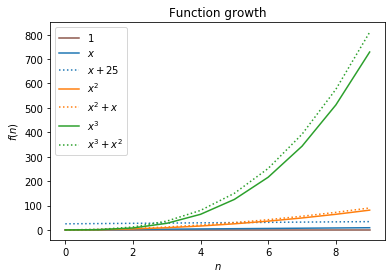

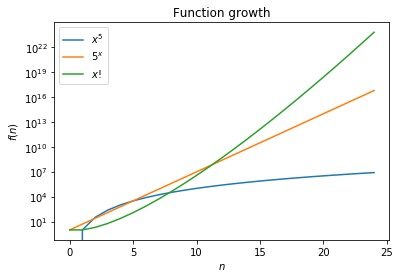

In [33]:
import matplotlib.pyplot as plt
from math import factorial

# Gràfica 1
ys0 = [1 for x in range(10)]
ys1 = [x for x in range(10)]
ys1_b = [x + 25 for x in range(10)]
ys2 = [x**2 for x in range(10)]
ys2_b = [x**2 + x for x in range(10)]
ys3 = [x**3 for x in range(10)]
ys3_b = [x**3 + x**2 for x in range(10)]

fig = plt.figure()
plt.plot(range(10), ys0, '-', color='tab:brown')
plt.plot(range(10), ys1, '-', color='tab:blue')
plt.plot(range(10), ys1_b, ':', color='tab:blue')
plt.plot(range(10), ys2, '-', color='tab:orange')
plt.plot(range(10), ys2_b, ':', color='tab:orange')
plt.plot(range(10), ys3, '-', color='tab:green')
plt.plot(range(10), ys3_b, ':', color='tab:green')

plt.legend(["$1$", "$x$", "$x+25$", "$x^2$", "$x^2+x$", "$x^3$",
            "$x^3+x^2$"])
plt.xlabel('$n$')
plt.ylabel('$f(n)$')
plt.title('Function growth')
plt.show()

# Gràfica 2
ys0 = [x**5 for x in range(25)]
ys1 = [5**x for x in range(25)]
ys2 = [factorial(x) for x in range(25)]

fig = plt.figure()
plt.plot(range(25), ys0)
plt.plot(range(25), ys1)
plt.plot(range(25), ys2)

plt.legend(["$x^5$", "$5^x$", "$x!$"])
plt.yscale("log")
plt.xlabel('$n$')
plt.ylabel('$f(n)$')
plt.title('Function growth')
plt.show()

In [34]:
# Resposta

2. Al codi d'exemple de la secció 4, que analitzava un conjunt de dades sobre l'afectació d'una pandèmia, hi hem afegit les dues funcions següents, que retornen els valors màxims i mínims trobats en una columna del `dataframe`, especificada com a paràmetre:

2.1. Escriviu un cas de prova per a la funció `get_min_value`, per a les columnes `deaths` i `dateRep`.

2.2. Escriviu un cas de prova per a la funció `get_max_value`, per a les columnes `deaths` i `dateRep`.

2.3. Creeu una *suite* amb els dos casos de prova i executeu-la.

2.4. Si heu detectat algun error, modifiqueu les funcions `get_min_value` i `get_max_value` per tal de controlar-lo. Torneu a executar la *suite* i comproveu que, efectivament, les modificacions realitzades han servir per a aconseguir una execució correcta de les funcions. 

In [35]:
def get_min_value(df, col):
    """
    Return the minimum value found in column `col`
        of the dataframe `df`.
    """
    return min(df[col])


def get_max_value(df, col):
    """
    Return the maximum value found in column `col`
        of the dataframe `df`.
    """
    return max(df[col])

In [36]:
# Resposta

3. Responeu a les següents preguntes en relació a l'entorn de programació en Python que hi ha a la màquina virtual:

3.1. Quina versió de `numpy` hi ha instal·lada?

3.2. En quin port es troba escoltant el servidor de `jupyter`?

3.3. Quin és el repositori de `git` d'on s'ha descarregat aquest *notebook*?

**Resposta:**

## 7.1.- Solucions als exercicis per practicar

1. A continuació hi trobareu un fragment de codi que genera dues gràfiques, que mostren un conjunt de funcions. La generació de les dues gràfiques conté codi duplicat, que podria eliminar-se fent *refactoring*.

Apliqueu *refactoring* per evitar la repetició de codi. Recordeu que el *refactoring* no altera el comportament del codi i, per tant, el codi que creeu ha de seguir generant les mateixes dues gràfiques.

In [37]:
%matplotlib inline

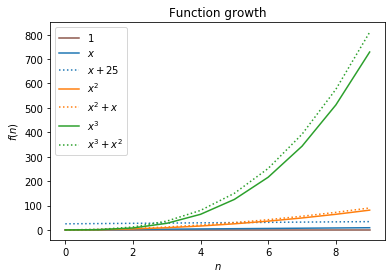

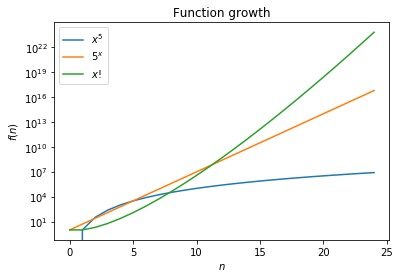

In [38]:
# Codi original (de l'enunciat)
import matplotlib.pyplot as plt
from math import factorial

# Gràfica 1
ys0 = [1 for x in range(10)]
ys1 = [x for x in range(10)]
ys1_b = [x + 25 for x in range(10)]
ys2 = [x**2 for x in range(10)]
ys2_b = [x**2 + x for x in range(10)]
ys3 = [x**3 for x in range(10)]
ys3_b = [x**3 + x**2 for x in range(10)]

fig = plt.figure()
plt.plot(range(10), ys0, '-', color='tab:brown')
plt.plot(range(10), ys1, '-', color='tab:blue')
plt.plot(range(10), ys1_b, ':', color='tab:blue')
plt.plot(range(10), ys2, '-', color='tab:orange')
plt.plot(range(10), ys2_b, ':', color='tab:orange')
plt.plot(range(10), ys3, '-', color='tab:green')
plt.plot(range(10), ys3_b, ':', color='tab:green')

plt.legend(["$1$", "$x$", "$x+25$", "$x^2$", "$x^2+x$", "$x^3$",
            "$x^3+x^2$"])
plt.xlabel('$n$')
plt.ylabel('$f(n)$')
plt.title('Function growth')
plt.show()

# Gràfica 2
ys0 = [x**5 for x in range(25)]
ys1 = [5**x for x in range(25)]
ys2 = [factorial(x) for x in range(25)]

fig = plt.figure()
plt.plot(range(25), ys0)
plt.plot(range(25), ys1)
plt.plot(range(25), ys2)

plt.legend(["$x^5$", "$5^x$", "$x!$"])
plt.yscale("log")
plt.xlabel('$n$')
plt.ylabel('$f(n)$')
plt.title('Function growth')
plt.show()

In [39]:
# Resposta


# Funció que genera els plots, amb paràmetres que permeten configurar-los
def plot_funs(xs, funs, legs, colors, stys, ylog=False,
              title='Function growth', xlabel='$n$', ylabel='$f(n)$'):

    fig = plt.figure()

    for (f, col, sty) in zip(funs, colors, stys):
        ys = [f(x) for x in xs]
        plt.plot(xs, ys, sty, color=col)

    if ylog:
        plt.yscale("log")

    plt.legend(legs)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

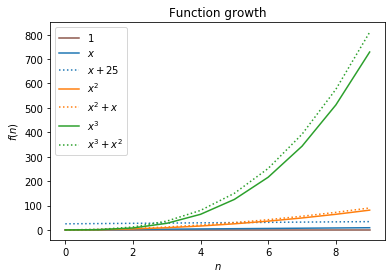

In [40]:
# Gràfica 1

xs = range(10)
funs = [lambda x: 1, lambda x: x, lambda x: x + 25,
        lambda x: x**2, lambda x: x**2 + x,
        lambda x: x**3, lambda x: x**3 + x**2]
legs = ["$1$", "$x$", "$x+25$",
        "$x^2$", "$x^2+x$",
        "$x^3$", "$x^3+x^2$"]
colors = ['tab:brown', 'tab:blue', 'tab:blue',
          'tab:orange', 'tab:orange',
          'tab:green', 'tab:green']
stys = ['-', '-', ':', '-', ':', '-', ':']

plot_funs(xs, funs, legs, colors, stys)

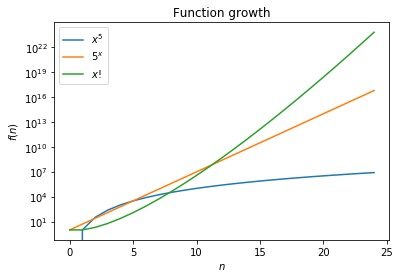

In [41]:
# Gràfica 2

xs = range(25)
funs = [lambda x: x**5, lambda x: 5**x, lambda x: factorial(x)]
legs = ["$x^5$", "$5^x$", "$x!$"]
colors = ['tab:blue', 'tab:orange', 'tab:green']
stys = ['-', '-', '-']

plot_funs(xs, funs, legs, colors, stys, ylog=True)

2. Al codi d'exemple de la secció 4, que analitzava un conjunt de dades sobre l'afectació d'una pandèmia, hi hem afegit les dues funcions següents, que retornen els valors màxims i mínims trobats en una columna del `dataframe`, especificada com a paràmetre:

2.1. Escriviu un cas de prova per a la funció `get_min_value`, per a les columnes `deaths` i `dateRep`.

2.2. Escriviu un cas de prova per a la funció `get_max_value`, per a les columnes `deaths` i `dateRep`.

2.3. Creeu una *suite* amb els dos casos de prova i executeu-la.

2.4. Si heu detectat algun error, modifiqueu les funcions `get_min_value` i `get_max_value` per tal de controlar-lo. Torneu a executar la *suite* i comproveu que, efectivament, les modificacions realitzades han servir per a aconseguir una execució correcta de les funcions. 

In [42]:
def get_min_value(df, col):
    """
    Return the minimum value found in column `col`
        of the dataframe `df`.
    """
    return min(df[col])


def get_max_value(df, col):
    """
    Return the maximum value found in column `col`
        of the dataframe `df`.
    """
    return max(df[col])

In [49]:
# Resposta
# 2.1


class TestMinValue(unittest.TestCase):

    @classmethod
    def setUpClass(cls):
        print("Loading dataset")
        cls._df = pd.read_csv("data/COVID-19.csv")

    def test_deaths(self):
        print("Starting test_deaths")
        # Min deaths can not be negative
        self.assertTrue(get_min_value(self._df, "deaths") >= 0)

    def test_dateRep(self):
        print("Starting test_dateRep")
        # Min date should have year 2019 (start of the pandemic)
        m = get_min_value(self._df, "dateRep")
        y = m.split("/")
        self.assertTrue(y[2] == "2019")


# 2.2
class TestMaxValue(unittest.TestCase):

    @classmethod
    def setUpClass(cls):
        print("Loading dataset")
        cls._df = pd.read_csv("data/COVID-19.csv")

    def test_deaths(self):
        print("Starting test_deaths")
        # Max deaths can not be negative
        self.assertTrue(get_max_value(self._df, "deaths") >= 0)
        # Max deaths can not be higher than max cases
        d = get_max_value(self._df, "deaths")
        c = get_max_value(self._df, "cases")
        self.assertTrue(d <= c)

    def test_dateRep(self):
        print("Starting test_dateRep")
        # Max date should have year 2020 (file contains data until mid-2020)
        m = get_max_value(self._df, "dateRep")
        y = m.split("/")
        self.assertTrue(y[2] == "2020")

In [50]:
# 2.3
suite = unittest.TestSuite()
suite.addTest(unittest.makeSuite(TestMinValue))
suite.addTest(unittest.makeSuite(TestMaxValue))
unittest.TextTestRunner(verbosity=2).run(suite)

test_dateRep (__main__.TestMinValue) ... ok
test_deaths (__main__.TestMinValue) ... ok
test_dateRep (__main__.TestMaxValue) ... ok
test_deaths (__main__.TestMaxValue) ... 

Loading dataset
Starting test_dateRep
Starting test_deaths
Loading dataset
Starting test_dateRep
Starting test_deaths


ok

----------------------------------------------------------------------
Ran 4 tests in 0.117s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

In [51]:
# Efectivament, si observem el resultat d'aquestes funcions per a
# la columna "dateRep", podem comprovar com retornen valors erronis
print("Max is: {}".format(get_max_value(df, "dateRep")))
print("Min is: {}".format(get_min_value(df, "dateRep")))

Max is: 12/04/2020
Min is: 31/12/2019


In [46]:
# Analitzant el tipus de dades de les columnes, podem veure
# quin és el problema (s'aplica min() sobre una cadena de
# caràcters, de manera que es considera l'ordre lexicogràfic)
df.dtypes

dateRep                     object
day                          int64
month                        int64
year                         int64
cases                        int64
deaths                       int64
countriesAndTerritories     object
geoId                       object
countryterritoryCode        object
popData2018                float64
continentExp                object
dtype: object

In [47]:
# 2.4

from pandas.api.types import is_string_dtype
import numpy as np


def get_min_value(df, col):
    """
    Return the minimum value found in column `col`
        of the dataframe `df`.
    """
    if is_string_dtype(df[col]):
        # Si la columna és de tipus cadena de caràcters, la convertim
        # a datetime abans de calcular el mínim
        i = np.argmin(np.array(pd.to_datetime(df[col])))
        return df[col][i]
    else:
        return min(df[col])


def get_max_value(df, col):
    """
    Return the maximum value found in column `col`
        of the dataframe `df`.
    """
    if is_string_dtype(df[col]):
        # Si la columna és de tipus cadena de caràcters, la convertim
        # a datetime abans de calcular el màxim
        i = np.argmax(np.array(pd.to_datetime(df[col])))
        return df[col][i]
    else:
        return max(df[col])

In [52]:
# Tornem a executar la suite de testos
suite = unittest.TestSuite()
suite.addTest(unittest.makeSuite(TestMinValue))
suite.addTest(unittest.makeSuite(TestMaxValue))
unittest.TextTestRunner(verbosity=2).run(suite)

test_dateRep (__main__.TestMinValue) ... ok
test_deaths (__main__.TestMinValue) ... ok
test_dateRep (__main__.TestMaxValue) ... ok
test_deaths (__main__.TestMaxValue) ... 

Loading dataset
Starting test_dateRep
Starting test_deaths
Loading dataset
Starting test_dateRep
Starting test_deaths


ok

----------------------------------------------------------------------
Ran 4 tests in 0.131s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

3. Responeu a les següents preguntes en relació a l'entorn de programació en Python que hi ha a la màquina virtual:

3.1. Quina versió de `numpy` hi ha instal·lada?

**Resposta:**

Podem comprovar-ho executant:

```
$ pip freeze | grep numpy
```

i obtindrem: `numpy==1.17.0`

3.2. En quin port es troba escoltant el servidor de `jupyter`?

**Resposta:**

El servidor de `jupyter` es troba al port `8888`, tal com s'indica a la consola al llançar-lo:

```
The Jupyter Notebook is running at:
http://localhost:8888/?token=****
```

3.3. Quin és el repositori de `git` d'on s'ha descarregat aquest *notebook*?

**Resposta:**

El *notebook* sobre el que treballem es troba al repositori:
https://eimtgit.uoc.edu/prog_datasci_2/resources/unit_6

tal com podem veure a l'*script* `get_content.sh` que fem servir per a descarregar el contingut de l'assignatura, o bé executant:
```
git config --get remote.origin.url
```
des de la còpia en local del repositori.

# 8.- Bibliografia


## 8.1.- Bibliografia bàsica

La bibliografia bàsica d'aquesta unitat és el contingut explicat en el *notebook* (no és necessari consultar cap enllaç extern).

## 8.2.- Bibliografia addicional - Ampliació de coneixements

Aquesta unitat presenta un recull de conceptes i eines relacionats amb la programació en Python, i que van més enllà del codi en si mateix. Cadascun d'aquestes conceptes i eines és tot un món per si mateix, del qual aquí només n'hem presentat una petita introducció.

* **Organització i distribució de codi**: Si esteu interessats en aprendre detalls addicionals sobre l'estructuració en paquets de codi Python, us recomanem la lectura de [l'article següent](https://intermediate-and-advanced-software-carpentry.readthedocs.io/en/latest/structuring-python.html) del curs de programació en Python d'en T. Brown. D'altra banda, si voleu conèixer el procés de preparar un paquet Python per a la seva distribució, us recomanem la lectura de la [documentació oficial de `setuptools`](https://setuptools.readthedocs.io/en/latest/setuptools.html).

* **Git**: Aquesta secció només inclou una molt breu introducció a git. Per tal d'acabar d'entendre els conceptes claus de git, us recomanem consultar aquests tres vídeo-tutorials ([1](https://www.youtube.com/watch?v=8oRjP8yj2Wo), [2](https://www.youtube.com/watch?v=uhtzxPU7Bz0), [3](https://www.youtube.com/watch?v=7w5Z7LmyLgI)) de les guies oficials, que expliquen més visualment les idees sobre les quals es construeix git. D'altra banda, si voleu anar més enllà d'aquests conceptes clau, us recomanem la lectura de la [git pocket guide](https://www.oreilly.com/library/view/git-pocket-guide/9781449327507/ch01.html), i consultar la pàgina de [recursos de github](https://try.github.io/), que conté diversos tutorials interactius.

* **Testing**: Podeu revisar la [taula de la documentació oficial](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.debug) per veure un resum de totes les sentències *assert* disponibles en el mòdul. 

* **Programació orientada a objectes:** En un dels exemples de `unittest`, s'ha utilitzat el decorador `@classmethod`. Investigueu sobre què són els decoradors en Python i, en concret, per què es fa servir `@classmethod`.